# MODELIZACIÓN PARA REGRESIÓN

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import TimeSeriesSplit

from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.pipeline import Pipeline

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_absolute_error

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

import pickle

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [8]:
ruta_proyecto = 'C:/Users/Marius/EstructuraDirectorio/03_MACHINE_LEARNING/06_CASOS/02_RETAIL'

Nombres de los ficheros de datos.

In [9]:
nombre_x = 'x_preseleccionado.pickle'
nombre_y = 'y_preseleccionado.pickle'

Cargar los datos.

In [10]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

In [11]:
x

,date,store_id,item_id,ventas_mm_7,ventas_mm_8,ventas_mm_6,ventas_mm_9,ventas_mm_10,ventas_mm_2,ventas_mm_5,...,sell_price_lag_1,sell_price_lag_7,rotura_stock_3_lag_1,rotura_stock_7_lag_1,rotura_stock_15_lag_1,month_2,month_te,month_11,year_2015,year_2013
0,2013-01-16,CA_3,FOODS_3_090,236.00,233.38,242.50,228.33,232.50,182.00,242.00,...,1.25,1.25,0.00,0.00,0.00,0.00,25.39,0.00,0.00,1.00
1,2013-01-17,CA_3,FOODS_3_090,235.14,230.38,233.50,228.67,224.60,174.50,237.40,...,1.25,1.25,0.00,0.00,0.00,0.00,25.39,0.00,0.00,1.00
2,2013-01-18,CA_3,FOODS_3_090,224.43,227.00,226.17,223.67,222.80,180.50,201.20,...,1.25,1.25,0.00,0.00,0.00,0.00,25.39,0.00,0.00,1.00
3,2013-01-19,CA_3,FOODS_3_090,225.86,224.38,205.00,226.67,223.70,197.00,189.80,...,1.25,1.25,0.00,0.00,0.00,0.00,25.39,0.00,0.00,1.00
4,2013-01-20,CA_3,FOODS_3_090,227.43,242.88,218.50,239.67,240.20,293.00,221.00,...,1.25,1.25,0.00,0.00,0.00,0.00,25.39,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20975,2015-11-26,CA_4,FOODS_3_714,9.86,9.38,10.67,9.67,9.50,9.00,9.80,...,1.58,1.58,0.00,0.00,0.00,0.00,28.13,1.00,1.00,0.00
20976,2015-11-27,CA_4,FOODS_3_714,12.29,11.38,11.83,10.78,10.90,14.00,11.60,...,1.58,1.58,0.00,0.00,0.00,0.00,28.13,1.00,1.00,0.00
20977,2015-11-28,CA_4,FOODS_3_714,11.57,12.00,11.33,11.22,10.70,16.00,10.60,...,1.58,1.58,0.00,0.00,0.00,0.00,28.13,1.00,1.00,0.00
20978,2015-11-29,CA_4,FOODS_3_714,12.14,12.25,11.67,12.56,11.80,13.50,13.40,...,1.58,1.58,0.00,0.00,0.00,0.00,28.13,1.00,1.00,0.00


## MODELIZANDO PARA UN PRODUCTO

In [12]:
x = x.loc[(x.store_id == 'CA_3') & (x.item_id == 'FOODS_3_586')]

In [13]:
x

,date,store_id,item_id,ventas_mm_7,ventas_mm_8,ventas_mm_6,ventas_mm_9,ventas_mm_10,ventas_mm_2,ventas_mm_5,...,sell_price_lag_1,sell_price_lag_7,rotura_stock_3_lag_1,rotura_stock_7_lag_1,rotura_stock_15_lag_1,month_2,month_te,month_11,year_2015,year_2013
7343,2013-01-16,CA_3,FOODS_3_586,9.14,9.12,9.33,9.33,9.10,11.50,8.60,...,1.48,1.48,0.00,0.00,0.00,0.00,25.39,0.00,0.00,1.00
7344,2013-01-17,CA_3,FOODS_3_586,8.86,8.75,8.17,8.78,9.00,9.00,8.40,...,1.48,1.48,0.00,0.00,0.00,0.00,25.39,0.00,0.00,1.00
7345,2013-01-18,CA_3,FOODS_3_586,8.86,9.38,9.17,9.22,9.20,9.50,8.80,...,1.48,1.48,0.00,0.00,0.00,0.00,25.39,0.00,0.00,1.00
7346,2013-01-19,CA_3,FOODS_3_586,9.00,8.75,8.67,9.22,9.10,10.50,10.00,...,1.48,1.48,0.00,0.00,0.00,0.00,25.39,0.00,0.00,1.00
7347,2013-01-20,CA_3,FOODS_3_586,9.29,9.50,10.50,9.22,9.60,10.50,10.40,...,1.48,1.48,0.00,0.00,0.00,0.00,25.39,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8387,2015-11-26,CA_3,FOODS_3_586,7.00,7.38,6.83,7.11,7.10,5.00,7.40,...,1.58,1.58,0.00,0.00,0.00,0.00,28.13,1.00,1.00,0.00
8388,2015-11-27,CA_3,FOODS_3_586,7.86,7.88,8.50,8.11,7.80,9.50,8.20,...,1.58,1.58,0.00,0.00,0.00,0.00,28.13,1.00,1.00,0.00
8389,2015-11-28,CA_3,FOODS_3_586,8.71,8.12,8.50,8.11,8.30,12.00,8.40,...,1.58,1.58,0.00,0.00,0.00,0.00,28.13,1.00,1.00,0.00
8390,2015-11-29,CA_3,FOODS_3_586,8.14,8.38,8.00,7.89,7.90,8.00,8.00,...,1.58,1.58,0.00,0.00,0.00,0.00,28.13,1.00,1.00,0.00


In [14]:
#seleccionar target
y = y[y.index.isin(x.index)]

### MODELIZAR

#### Definir las variables de modelización

In [15]:
var_modelizar = x.columns.to_list()[3:]

#### Definir la validacion

In [17]:
#Para validar usaremos TimeSeriesSplit es mas especifica para proyectos de series temporales
#considerar el numero de repeticiones, teniendo en cuenta que es una modelizacion masiva
time_cv = TimeSeriesSplit(3, test_size = 8)

#### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

Modificar para dejar solo los algoritmos que se quieran testar.

Modificar los parámetros.

In [18]:
pipe = Pipeline([('algoritmo',HistGradientBoostingRegressor())])

grid = [   {'algoritmo': [HistGradientBoostingRegressor()]
#          'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
#          'algoritmo__max_iter': [50,100,200],
#          'algoritmo__max_depth': [5,10,20],
#          'algoritmo__min_samples_leaf': [500],
#          'algoritmo__scoring': ['neg_mean_absolute_error'],
#          'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]
           }
       ]

#funciona por defecto, sin ningun parametro añadido por nuestra parte

#### Optimizar los hiper parámetros

#####  Con random search

In [19]:
random_search = RandomizedSearchCV(estimator = pipe,
                                   param_distributions = grid, 
                                   n_iter = 1, 
                                   cv = time_cv, 
                                   scoring = 'neg_mean_absolute_error', 
                                   verbose = 0,
                                   n_jobs = -1)

modelo = random_search.fit(x[var_modelizar],y)

pd.DataFrame(random_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.10,0.01,0.00,0.00,HistGradientBoostingRegressor(),{'algoritmo': HistGradientBoostingRegressor()},-4.19,-2.13,-3.32,-3.21,0.85,1


In [22]:
modelo_final = modelo.best_estimator_.fit(x[var_modelizar],y)

In [23]:
#predecimos sobre los datos con los cuales hemos entrenado, no con los de validacion que seria lo correcto
#porque no importa el mae, simplemente interesa que el proceso funcione.
prediccion = modelo_final.predict(x[var_modelizar])

In [24]:
temp = pd.concat([x.date.reset_index(drop=True),y.reset_index(drop=True),pd.Series(prediccion,name = 'prediccion')],axis = 1).set_index('date')

In [25]:
temp

,ventas,prediccion
date,,
2013-01-16,6,7.00
2013-01-17,13,11.25
2013-01-18,8,10.20
2013-01-19,13,11.75
2013-01-20,13,11.26
...,...,...
2015-11-26,14,11.68
2015-11-27,10,10.18
2015-11-28,6,6.61


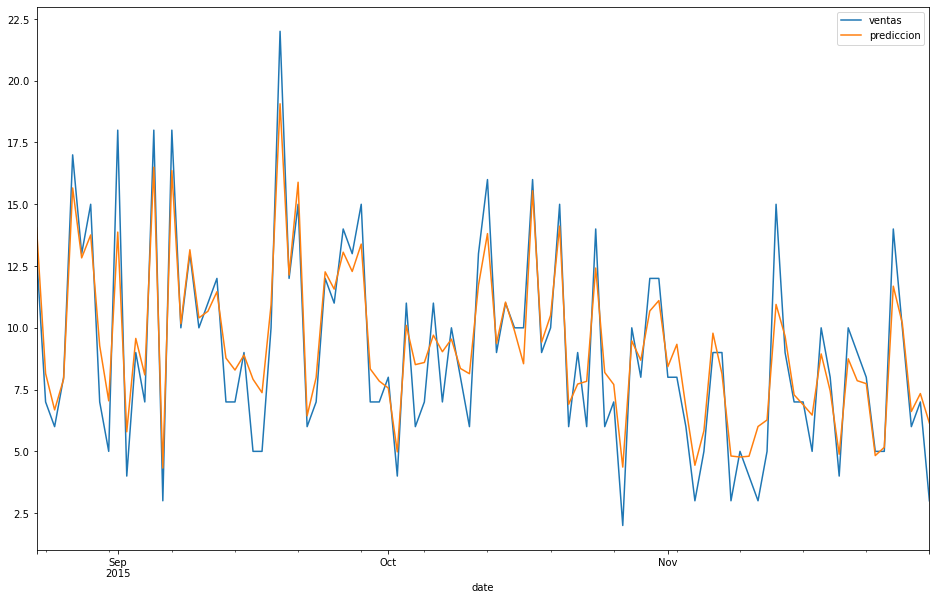

In [26]:
temp.tail(100).plot(figsize = (16,10));

## ESCALAR A TODOS LOS PRODUCTOS

### MODELIZACIÓN

Ya tenemos el proceso funcionando para modelizar un producto.

Ahora tenemos que escalarlo a todas las combinaciones de tiendas y productos.

Primero vamos a volver a importar los datos.

In [27]:
nombre_x = 'x_preseleccionado.pickle'
nombre_y = 'y_preseleccionado.pickle'

In [28]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

Incluímos como una nueva variable la combinación de tienda-producto y eliminamos las originales.

In [29]:
x.insert(loc=0,column='producto',value=x.store_id + '_'+ x.item_id)
x = x.drop(columns = ['store_id','item_id'])

In [30]:
x

,producto,date,ventas_mm_7,ventas_mm_8,ventas_mm_6,ventas_mm_9,ventas_mm_10,ventas_mm_2,ventas_mm_5,ventas_mm_3,...,sell_price_lag_1,sell_price_lag_7,rotura_stock_3_lag_1,rotura_stock_7_lag_1,rotura_stock_15_lag_1,month_2,month_te,month_11,year_2015,year_2013
0,CA_3_FOODS_3_090,2013-01-16,236.00,233.38,242.50,228.33,232.50,182.00,242.00,215.00,...,1.25,1.25,0.00,0.00,0.00,0.00,25.39,0.00,0.00,1.00
1,CA_3_FOODS_3_090,2013-01-17,235.14,230.38,233.50,228.67,224.60,174.50,237.40,185.00,...,1.25,1.25,0.00,0.00,0.00,0.00,25.39,0.00,0.00,1.00
2,CA_3_FOODS_3_090,2013-01-18,224.43,227.00,226.17,223.67,222.80,180.50,201.20,173.00,...,1.25,1.25,0.00,0.00,0.00,0.00,25.39,0.00,0.00,1.00
3,CA_3_FOODS_3_090,2013-01-19,225.86,224.38,205.00,226.67,223.70,197.00,189.80,195.00,...,1.25,1.25,0.00,0.00,0.00,0.00,25.39,0.00,0.00,1.00
4,CA_3_FOODS_3_090,2013-01-20,227.43,242.88,218.50,239.67,240.20,293.00,221.00,252.00,...,1.25,1.25,0.00,0.00,0.00,0.00,25.39,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20975,CA_4_FOODS_3_714,2015-11-26,9.86,9.38,10.67,9.67,9.50,9.00,9.80,7.00,...,1.58,1.58,0.00,0.00,0.00,0.00,28.13,1.00,1.00,0.00
20976,CA_4_FOODS_3_714,2015-11-27,12.29,11.38,11.83,10.78,10.90,14.00,11.60,13.33,...,1.58,1.58,0.00,0.00,0.00,0.00,28.13,1.00,1.00,0.00
20977,CA_4_FOODS_3_714,2015-11-28,11.57,12.00,11.33,11.22,10.70,16.00,10.60,12.67,...,1.58,1.58,0.00,0.00,0.00,0.00,28.13,1.00,1.00,0.00
20978,CA_4_FOODS_3_714,2015-11-29,12.14,12.25,11.67,12.56,11.80,13.50,13.40,16.33,...,1.58,1.58,0.00,0.00,0.00,0.00,28.13,1.00,1.00,0.00


Para poder aplicar el proceso de forma recurrente vamos a crear una lista donde cada elemento sean los datos de cada producto.

In [31]:
productos = list(x.groupby("producto"))

Encapsulamos el proceso de modelización individual en una función, a la que iremos llamando en cada producto.

In [33]:
#Recibe los datos de las x y la y de cada producto

def modelizar(x_producto, y):
          
    #Excluye el producto como variable de modelización
    var_modelizar = x_producto.columns.to_list()[2:]
    
    #Define la validación cruzada
    time_cv = TimeSeriesSplit(3, test_size = 8)
    
    #Define la parrilla de algoritmos
    pipe = Pipeline([('algoritmo',HistGradientBoostingRegressor())])
    grid = [ 
         {'algoritmo': [HistGradientBoostingRegressor()]
#          'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
#          'algoritmo__max_iter': [50,100,200],
#          'algoritmo__max_depth': [5,10,20,50],
#          'algoritmo__scoring': ['neg_mean_absolute_error'],
#          'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]
         }
                       
    ]
           
    #Crea los modelos
    random_search = RandomizedSearchCV(estimator = pipe,
                                   param_distributions = grid, 
                                   n_iter = 1, 
                                   cv = time_cv, 
                                   scoring = 'neg_mean_absolute_error', 
                                   verbose = 0,
                                   n_jobs = -1)
    
    modelo = random_search.fit(x_producto[var_modelizar],y)
    
    #Reentrena el mejor sobre todos los datos
    modelo_final = modelo.best_estimator_.fit(x_producto[var_modelizar],y)
    
    #Devuelve como salida el modelo final
    return(modelo_final)

Creamos otra lista vacía donde vamos a ir guardando los modelos entrenados de cada producto.

In [34]:
lista_modelos = []

Recorremos cada elemento de la lista de productos y vamos rellendando lista_modelos con el nombre y modelo final de cada producto.

In [35]:
productos

[('CA_3_FOODS_3_090',
                producto       date  ventas_mm_7  ventas_mm_8  ventas_mm_6  \
  0     CA_3_FOODS_3_090 2013-01-16       236.00       233.38       242.50   
  1     CA_3_FOODS_3_090 2013-01-17       235.14       230.38       233.50   
  2     CA_3_FOODS_3_090 2013-01-18       224.43       227.00       226.17   
  3     CA_3_FOODS_3_090 2013-01-19       225.86       224.38       205.00   
  4     CA_3_FOODS_3_090 2013-01-20       227.43       242.88       218.50   
  ...                ...        ...          ...          ...          ...   
  1044  CA_3_FOODS_3_090 2015-11-26       139.43       134.50       151.50   
  1045  CA_3_FOODS_3_090 2015-11-27       166.43       154.00       172.67   
  1046  CA_3_FOODS_3_090 2015-11-28       157.71       154.12       160.67   
  1047  CA_3_FOODS_3_090 2015-11-29       150.43       149.12       156.83   
  1048  CA_3_FOODS_3_090 2015-11-30       143.29       139.38       151.33   
  
        ventas_mm_9  ventas_mm_10  vent

In [ ]:
productos[0][0]
#la estructura de productos es una lista que contiene 1 tupla en la que hay dos elementos
#en la 0 esta el nombre del product

In [41]:
productos[0][1]

,producto,date,ventas_mm_7,ventas_mm_8,ventas_mm_6,ventas_mm_9,ventas_mm_10,ventas_mm_2,ventas_mm_5,ventas_mm_3,...,sell_price_lag_1,sell_price_lag_7,rotura_stock_3_lag_1,rotura_stock_7_lag_1,rotura_stock_15_lag_1,month_2,month_te,month_11,year_2015,year_2013
0,CA_3_FOODS_3_090,2013-01-16,236.00,233.38,242.50,228.33,232.50,182.00,242.00,215.00,...,1.25,1.25,0.00,0.00,0.00,0.00,25.39,0.00,0.00,1.00
1,CA_3_FOODS_3_090,2013-01-17,235.14,230.38,233.50,228.67,224.60,174.50,237.40,185.00,...,1.25,1.25,0.00,0.00,0.00,0.00,25.39,0.00,0.00,1.00
2,CA_3_FOODS_3_090,2013-01-18,224.43,227.00,226.17,223.67,222.80,180.50,201.20,173.00,...,1.25,1.25,0.00,0.00,0.00,0.00,25.39,0.00,0.00,1.00
3,CA_3_FOODS_3_090,2013-01-19,225.86,224.38,205.00,226.67,223.70,197.00,189.80,195.00,...,1.25,1.25,0.00,0.00,0.00,0.00,25.39,0.00,0.00,1.00
4,CA_3_FOODS_3_090,2013-01-20,227.43,242.88,218.50,239.67,240.20,293.00,221.00,252.00,...,1.25,1.25,0.00,0.00,0.00,0.00,25.39,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,CA_3_FOODS_3_090,2015-11-26,139.43,134.50,151.50,126.11,122.90,216.50,156.00,176.00,...,1.50,1.50,0.00,0.00,0.00,0.00,28.13,1.00,1.00,0.00
1045,CA_3_FOODS_3_090,2015-11-27,166.43,154.00,172.67,148.00,139.10,289.50,179.20,229.67,...,1.50,1.50,0.00,0.00,0.00,0.00,28.13,1.00,1.00,0.00
1046,CA_3_FOODS_3_090,2015-11-28,157.71,154.12,160.67,144.44,140.00,162.00,170.40,215.67,...,1.50,1.50,0.00,0.00,0.00,0.00,28.13,1.00,1.00,0.00
1047,CA_3_FOODS_3_090,2015-11-29,150.43,149.12,156.83,146.89,138.90,78.50,169.20,137.67,...,1.50,1.50,0.00,0.00,0.00,0.00,28.13,1.00,1.00,0.00


In [42]:
for cada in productos:
    #Renombra por claridad
    producto = cada[0] #
    datos = cada[1]
    #Selecciona solo los datos de la target que se corresponden con el producto
    #el producto tiene 1049 registros y la target tiene 20979 por lo tanto solo va comparar con aquellos registros que coincidan
    y_cada = y[y.index.isin(datos.index)]

    #Llama a la funcion de modelizar
    modelo = modelizar(datos,y_cada)
    #Añade el modelo final a la lista
    lista_modelos.append((producto,modelo))
    

In [43]:
lista_modelos

[('CA_3_FOODS_3_090',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_120',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_202',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_252',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_288',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_329',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_555',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_586',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_587',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_714',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_4_FOODS_3_090',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),

Comprobamos.

NOTA: El objetivo aquí no es evaluar la calidad del modelo, ya que no estamos usando los datos de entrenamiento.

Es simplemente comprobar que el proceso funciona bien y no vemos nada raro antes de continuar.

In [44]:
len(lista_modelos)

20

In [49]:
#estas son las variables exactas con el que este modelo fue entrenado
#cada modelo fue entrenado con un pull de variables diferentes
lista_modelos[8][1].feature_names_in_

array(['ventas_mm_7', 'ventas_mm_8', 'ventas_mm_6', 'ventas_mm_9',
       'ventas_mm_10', 'ventas_mm_2', 'ventas_mm_5', 'ventas_mm_3',
       'ventas_mm_4', 'ventas_maxm_2', 'ventas_lag_1', 'ventas_mm_11',
       'ventas_mm_15', 'ventas_mm_12', 'ventas_maxm_8', 'ventas_maxm_7',
       'ventas_mm_13', 'ventas_mm_14', 'ventas_maxm_6', 'ventas_maxm_3',
       'ventas_maxm_9', 'ventas_maxm_10', 'ventas_maxm_4',
       'ventas_maxm_5', 'ventas_minm_2', 'ventas_maxm_13',
       'ventas_maxm_14', 'ventas_maxm_12', 'ventas_maxm_11',
       'ventas_maxm_15', 'ventas_minm_3', 'ventas_minm_4',
       'ventas_minm_5', 'ventas_minm_6', 'ventas_minm_7', 'ventas_lag_2',
       'ventas_minm_8', 'ventas_lag_7', 'ventas_minm_9', 'ventas_lag_6',
       'ventas_minm_10', 'ventas_lag_3', 'ventas_minm_11',
       'ventas_minm_12', 'ventas_minm_13', 'ventas_lag_8', 'ventas_lag_4',
       'ventas_lag_5', 'ventas_minm_14', 'ventas_minm_15',
       'ventas_lag_14', 'ventas_lag_13', 'ventas_lag_9', 'ventas_lag_1

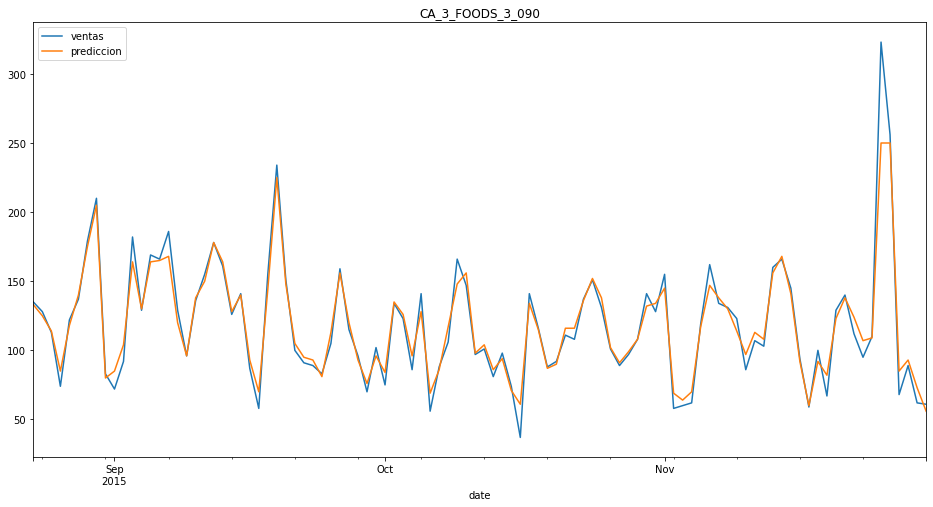

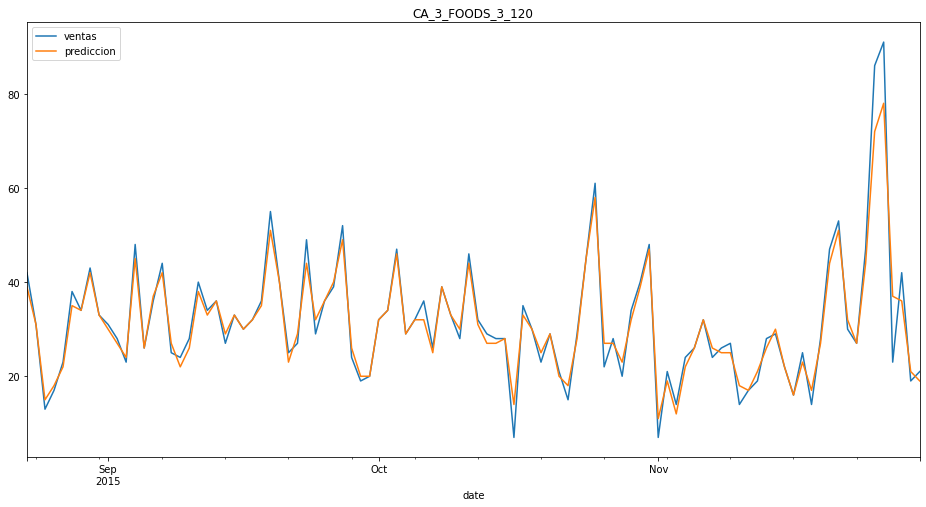

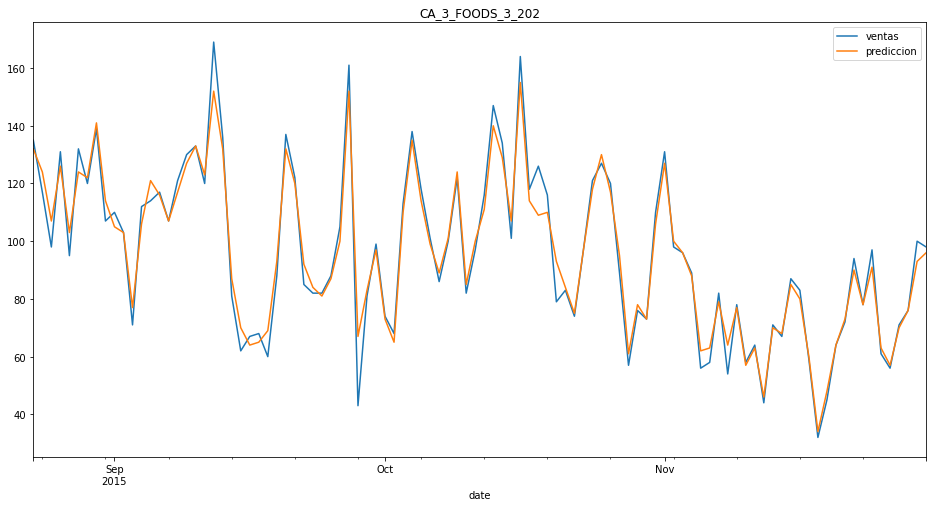

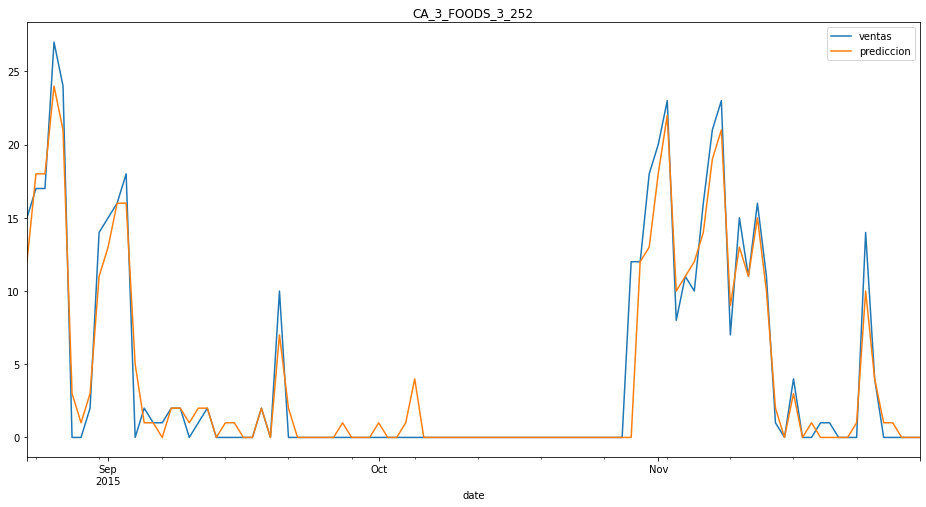

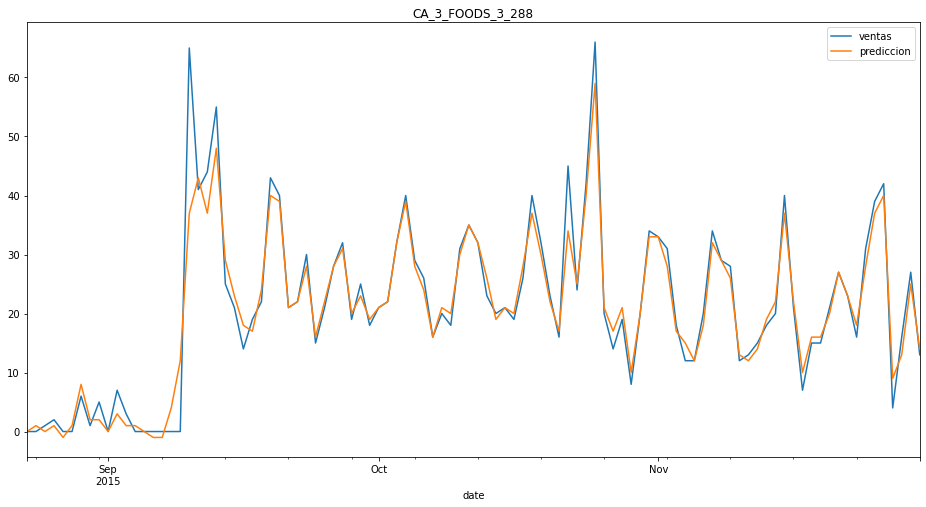

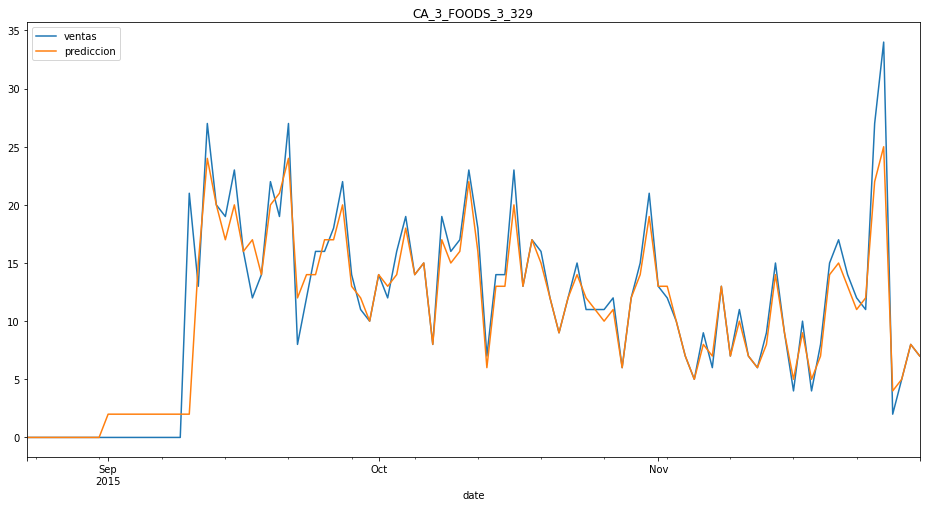

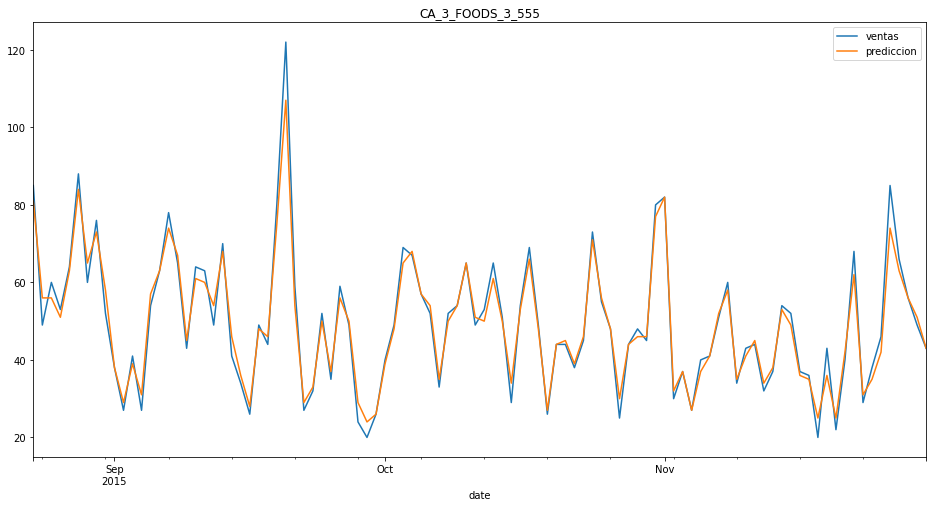

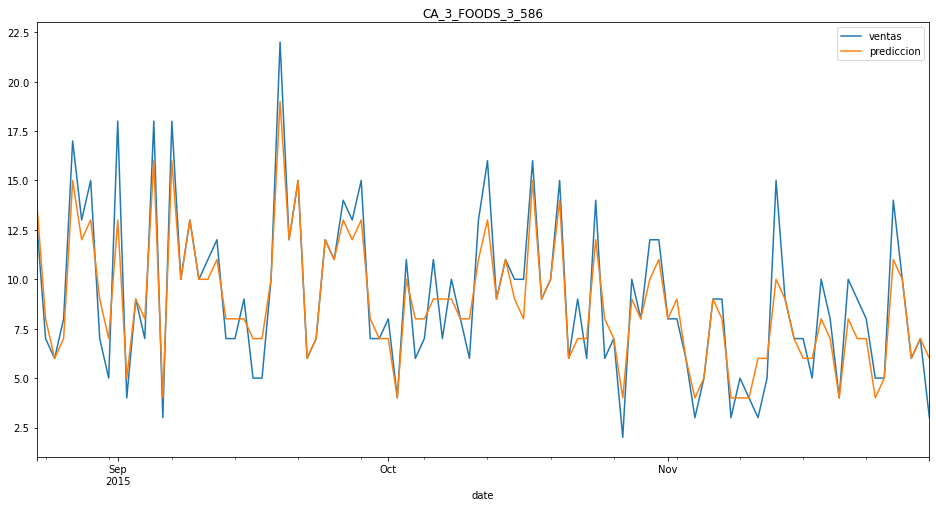

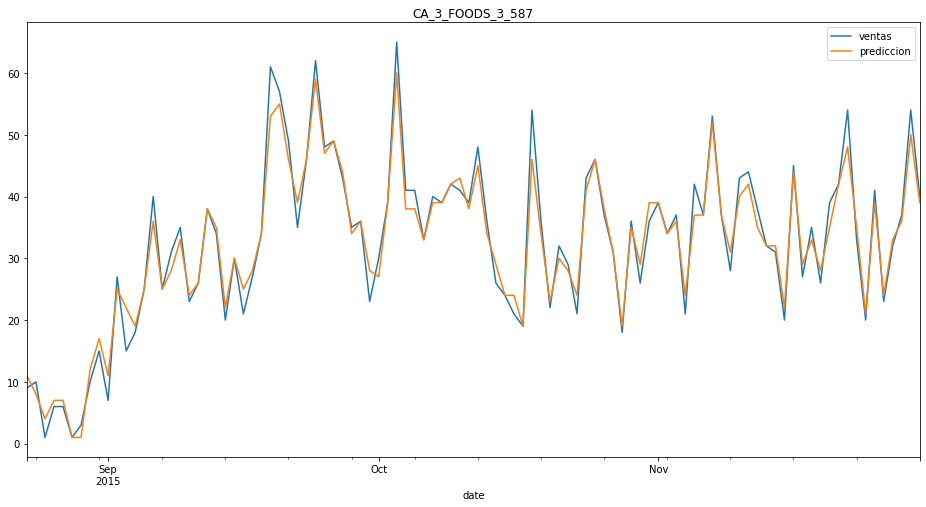

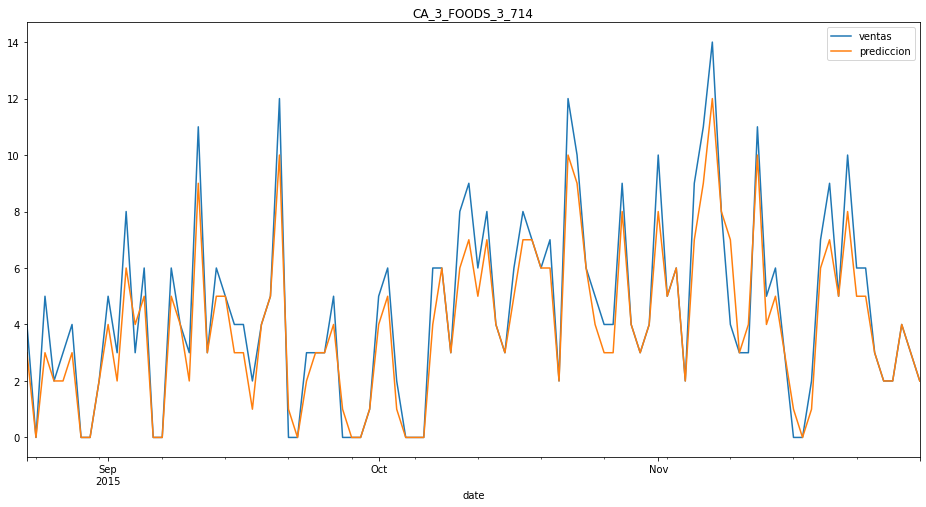

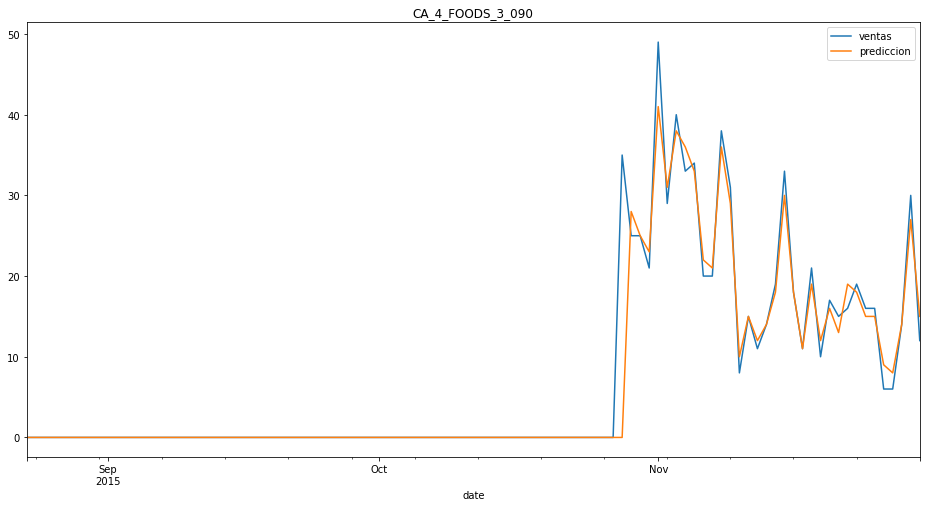

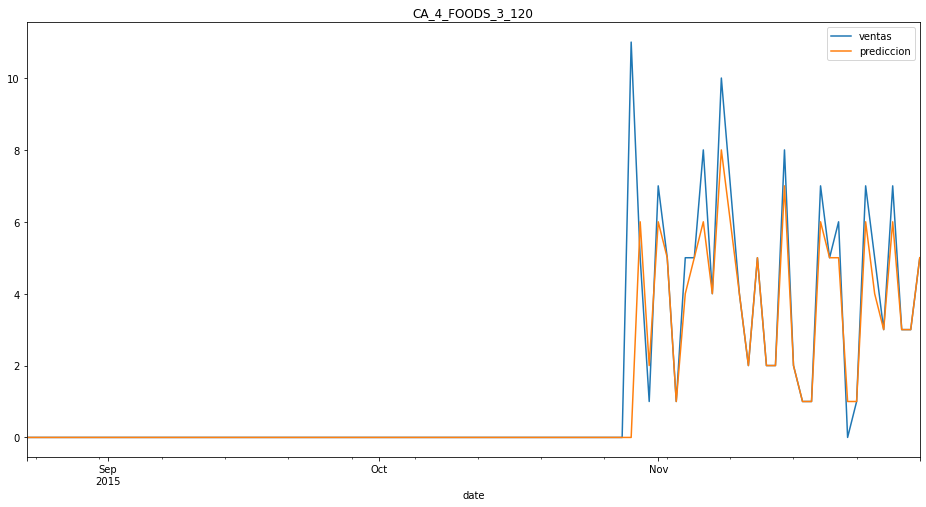

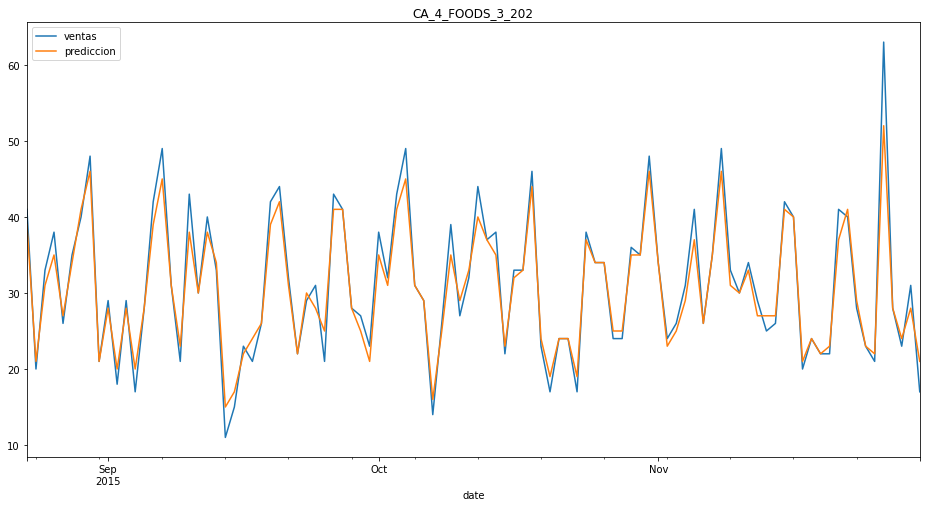

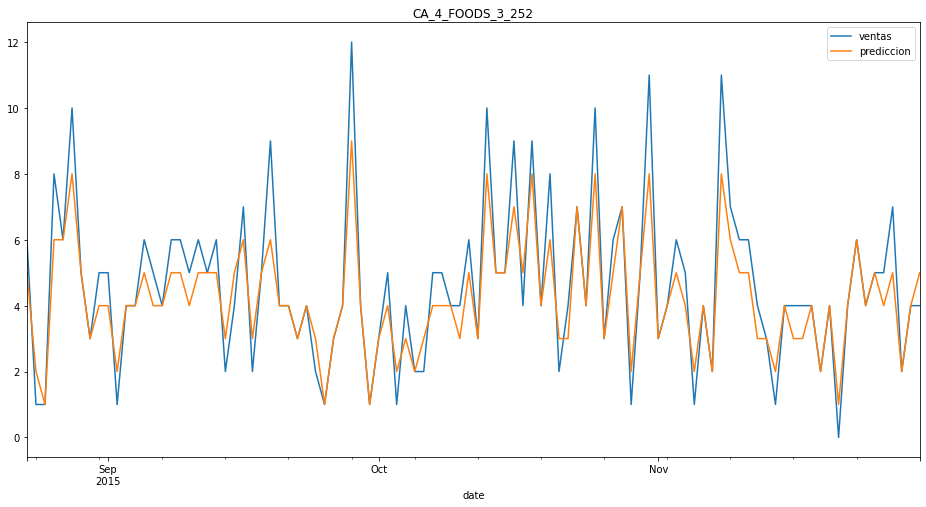

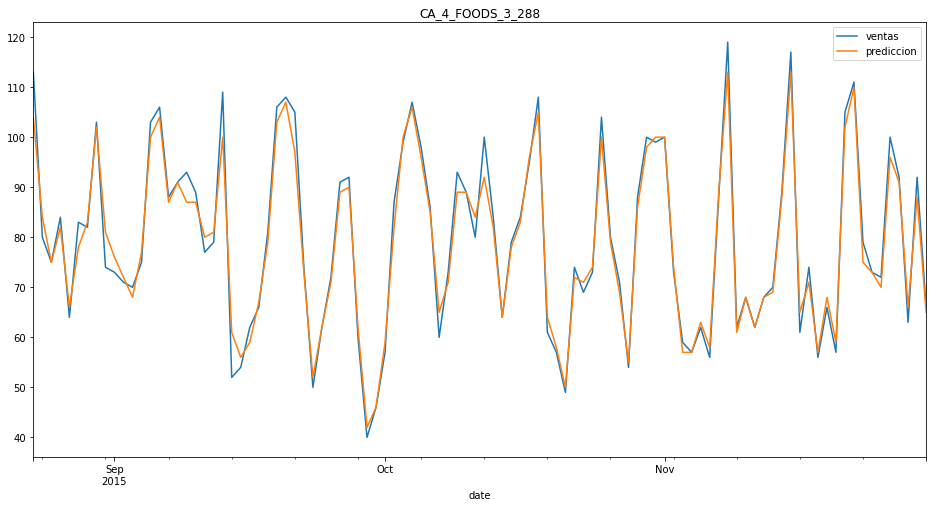

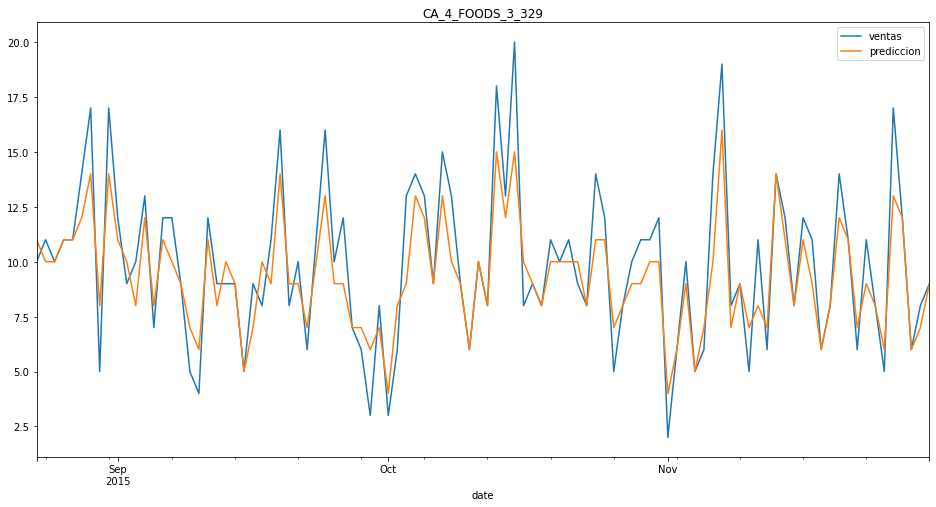

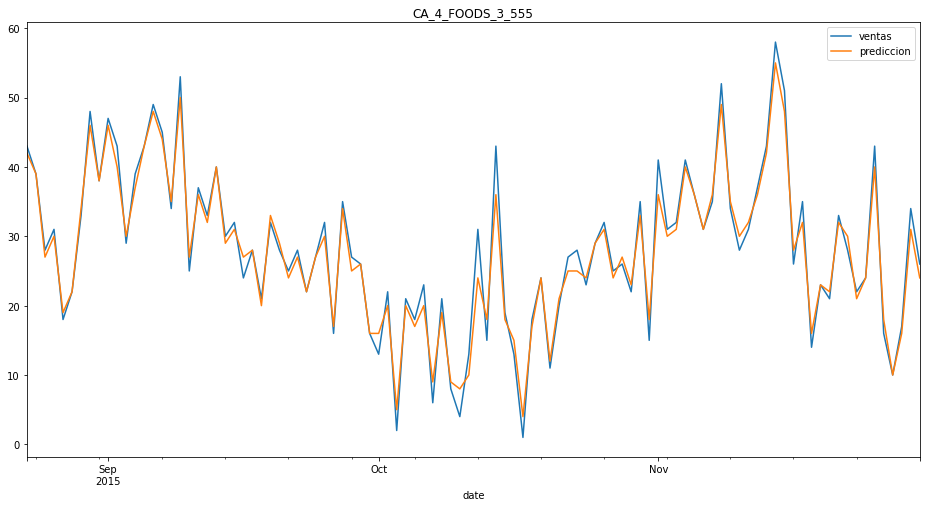

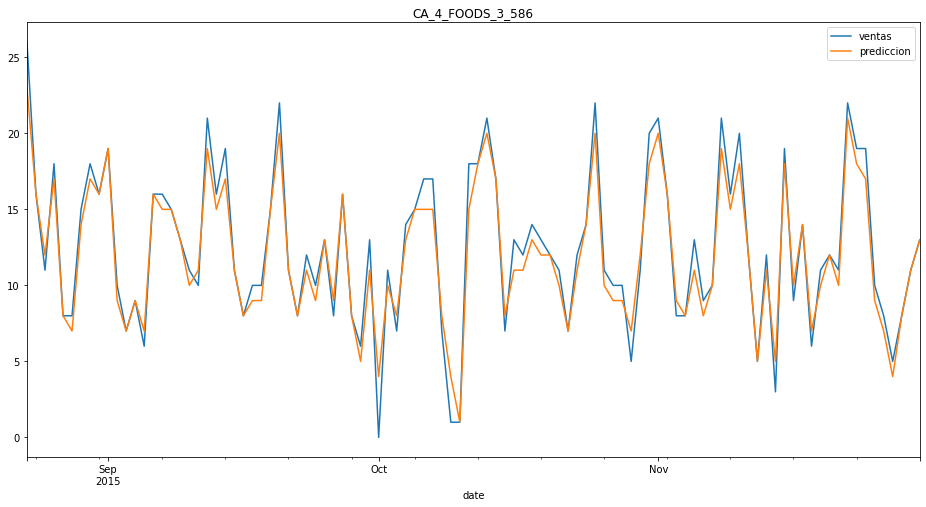

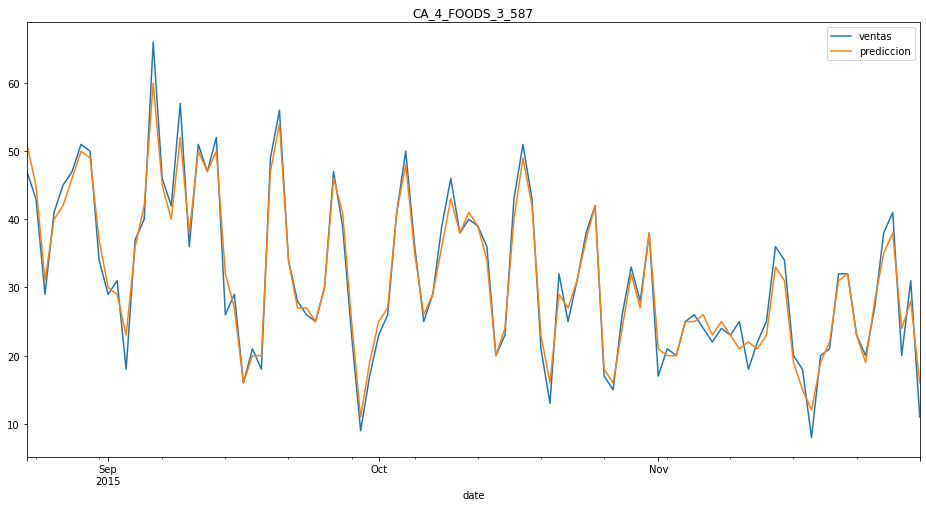

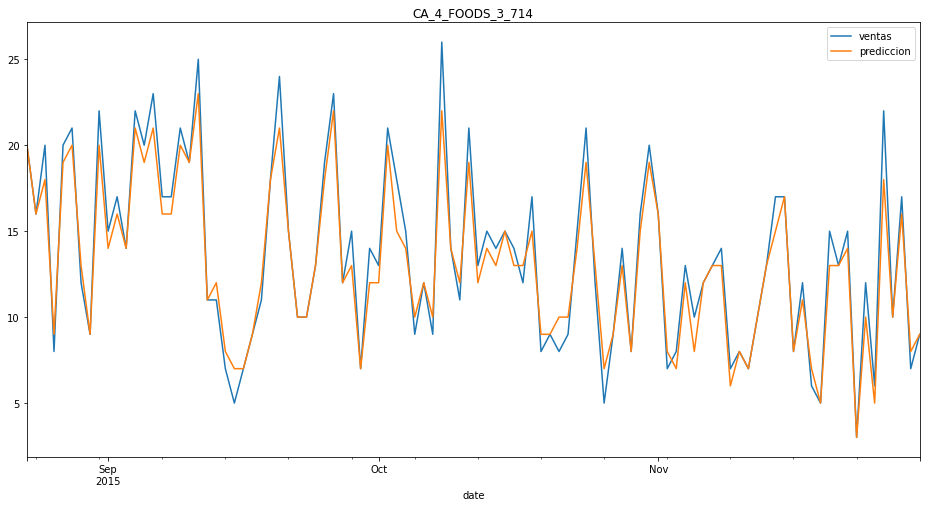

In [50]:

#unificar el df para poder extraer los x e y de cada producto
df =  pd.concat([x,y],axis=1)

for cada in range(0,len(lista_modelos)):
    
    #Prepara los datos necesarios
    producto = lista_modelos[cada][0]
    modelo = lista_modelos[cada][1]
    variables = modelo[0].feature_names_in_
    target = 'ventas'

    x_prod = df.loc[df.producto == producto].drop(columns=target).copy()
    y_prod = df.loc[df.producto == producto,'ventas'].copy()

    date = x_prod.date.values
    
    #Genera graficos de predicho vs real
    predicciones = pd.DataFrame(data={'date': date,
                                      'producto': producto,
                                      'ventas': y_prod,
                                      'prediccion': modelo.predict(x_prod[variables])})

    predicciones['prediccion'] = predicciones.prediccion.astype('int')
    predicciones.set_index('date',inplace=True)

    predicciones.tail(100).plot(figsize = (16,8),title = producto); #tail es un zoom